In [93]:

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers.recurrent import LSTM
from sklearn import model_selection

In [ ]:
def evaluate_model(y_predict, y_test):
    count_ccr = 0
    TP = 0
    FP = 0
    FN = 0
    for i in range(len(y_test)):
        if y_predict[i]==y_test[i]:
            count_ccr+=1
        if y_predict[i]==1 and y_test[i]==1:
            TP+=1
        if y_predict[i]==1 and y_test[i]==0:
            FP+=1
        if y_predict[i]==0 and y_test[i]==1:
            FN+=1
    ccr = count_ccr/len(y_test)
    if (TP+FP)==0:
        print('All the prediction is normal')
        preci = 0
    else:
        preci = TP/(TP+FP)
    recall= TP/(TP+FN)
    #print('For this model, the CCR is', ccr, ', the Precision is', preci, 'and the Recall is', recall )
    return ccr,preci,recall

In [95]:
data = pd.read_csv("dataset/attack1with7FeatureVector.csv")
data = data.dropna(axis=0, how="any")#remove invalid data

,re_time,re_ID,re_x,re_y,tr_time,tr_ID,tr_x,tr_y,tr_vx,tr_vy,RSSI,Label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7
0,21600,16,3587.6,5846.8,21600,7,3584.4,5805.2,-0.030508,31.477,4.620000e-08,0,0.250000,0.0,0.299677,0.010714,0.299869,0.004903,0.0
1,21601,22,3621.7,5340.2,21601,7,3584.4,5836.7,-0.030526,31.496,3.300000e-09,0,0.400000,0.0,0.631183,0.077000,0.635862,0.326928,0.0
2,21601,28,3592.7,5922.6,21601,7,3584.4,5836.7,-0.030526,31.496,7.630000e-08,0,0.285714,0.0,0.435690,0.037714,0.437320,0.108111,0.0
3,21600,34,3639.9,5251.6,21600,7,3584.4,5805.2,-0.030508,31.477,2.990000e-09,0,1.000000,0.0,0.030508,0.023000,0.038207,0.022985,0.0
4,21602,40,3623.4,5367.0,21602,7,3584.3,5868.2,-0.030407,31.373,3.970000e-09,0,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
5,21600,46,3604.8,5534.8,21600,7,3584.4,5805.2,-0.030508,31.477,1.090000e-08,0,0.500000,0.0,0.230480,0.015333,0.230990,0.044136,0.0
6,21600,52,3597.2,5993.1,21600,7,3584.4,5805.2,-0.030508,31.477,7.760000e-09,0,0.250000,0.0,0.385043,0.030125,0.386219,0.103567,0.0
7,21600,58,3601.0,6031.9,21600,7,3584.4,5805.2,-0.030508,31.477,8.180000e-09,0,0.285714,0.0,0.384193,0.041625,0.386441,0.195760,0.0
8,21600,64,3594.6,5742.5,21600,7,3584.4,5805.2,-0.030508,31.477,3.530000e-08,0,0.285714,0.0,0.299192,0.017286,0.299690,0.041185,0.0
9,21600,70,3599.6,5596.3,21600,7,3584.4,5805.2,-0.030508,31.477,1.080000e-08,0,0.666667,0.0,0.019483,0.013500,0.023703,0.027050,0.0


In [ ]:
X = data.iloc[:,[2,3,6,7,8,9,12,13,14,15,16,17,18]]
y = data.iloc[:,11]

In [108]:
from itertools import chain
list_ccr_1    =[]
list_recall_1 =[]
list_preci_1  =[]

list_ccr_2    =[]
list_recall_2 =[]
list_preci_2  =[]
for i in range(10):
    X = data.iloc[:,[2,3,6,7,8,9,12,13,14,15,16,17,18]]
    y = data.iloc[:,11]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )
    print(X_train.shape)
    
    
    model_no_feature = Sequential()
    model_no_feature.add(Dense(64, input_dim=6, activation='sigmoid'))
    model_no_feature.add(Dense(16, activation='sigmoid'))
    model_no_feature.add(Dense(1, activation='sigmoid'))
    model_no_feature.compile(loss='mean_absolute_error', optimizer='RMSprop', metrics=['binary_accuracy'])    
    model_no_feature.fit(X_train.iloc[:,:6], y_train, epochs=8,batch_size=100,verbose=0)
    y_predict = np.round(model_no_feature.predict(X_test.iloc[:,:6]))
    y_predict =np.reshape(y_predict, (y_predict.shape[0],  1))
    ccr_no_feature,preci_no_feature,recall_no_feature = evaluate_model(y_predict, y_test.values)
    
    model_feature = Sequential()
    model_feature.add(Dense(64, input_dim=7, activation='sigmoid'))
    model_feature.add(Dense(16, activation='sigmoid'))
    model_feature.add(Dense(1, activation='sigmoid'))
    model_feature.compile(loss='mean_absolute_error', optimizer='RMSprop', metrics=['binary_accuracy'])
    model_feature.fit(X_train.iloc[:,6:], y_train, epochs=8,batch_size=100,verbose=0)
    y_predict = np.round(model_feature.predict(X_test.iloc[:,6:]))
    ccr_feature,preci_feature,recall_feature = evaluate_model(y_predict, y_test.values)
    
    list_ccr_1.append(ccr_no_feature)
    list_recall_1.append(recall_no_feature)
    list_preci_1.append(preci_no_feature)
    
    list_ccr_2.append(ccr_feature)
    list_preci_2.append(preci_feature)
    list_recall_2.append(recall_feature)


(24470, 13)
For this model, the CCR is 0.9154952598888526 , the Precision is 0.9937543372657877 and the Recall is 0.7381443298969073
For this model, the CCR is 0.9887218045112782 , the Precision is 1.0 and the Recall is 0.9644329896907217
(24470, 13)
For this model, the CCR is 0.9172932330827067 , the Precision is 0.9878831076265147 and the Recall is 0.7392
For this model, the CCR is 0.9887218045112782 , the Precision is 1.0 and the Recall is 0.9632
(24470, 13)
For this model, the CCR is 0.9050343249427918 , the Precision is 0.9521829521829522 and the Recall is 0.7285259809119831
For this model, the CCR is 0.9883949002942138 , the Precision is 1.0 and the Recall is 0.9623541887592789
(24470, 13)
For this model, the CCR is 0.9217064400130762 , the Precision is 0.9958791208791209 and the Recall is 0.7540301612064483
For this model, the CCR is 0.9883949002942138 , the Precision is 1.0 and the Recall is 0.9630785231409257
(24470, 13)
For this model, the CCR is 0.974664923177509 , the Preci

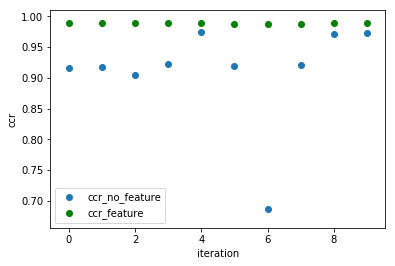

In [111]:

plt.scatter(range(10),list_ccr_1,label = 'ccr_no_feature')
plt.scatter(range(10),list_ccr_2,label = 'ccr_feature',c='g')
plt.legend(loc='best')
plt.xlabel("iteration")
plt.ylabel("ccr")
plt.show()


In [ ]:

plt.scatter(range(10),list_preci_1,label = 'ccr_no_feature')
plt.scatter(range(10),list_preci_2,label = 'ccr_feature',c='g')
plt.legend(loc='best')
plt.xlabel("iteration")
plt.ylabel("preci")
plt.show()
